In [1]:
from pathlib import Path

ROOT = Path(globals()['__vsc_ipynb_file__']).parent.parent
print(ROOT)

import sys
sys.path.append(str(ROOT))

/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization


In [2]:
import pickle as pkl
import numpy as np

In [3]:
with open('/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization/data/1/109bonds/TwoLocal2rep_color_piby3_fez_0.1/0_655.pkl', 'rb') as f:
    data = pkl.load(f)

In [4]:
data.keys()

dict_keys(['optimizer_internal_status', 'optimizer_internal_status_dict', 'list_x', 'list_fx'])

In [5]:
l_x = data['list_x'][0]
l_x = [np.fromiter(map(int, "{0:0{num_qubits}b}".format(x, num_qubits=109)), dtype='float') for x in l_x]
l_fx = data['list_fx'][0]

In [6]:
np.mean(data['list_fx'][0])

22671927.219674245

In [7]:
from src.step_1 import model_to_obj
from sbo_step4 import postprocess_iter
import docplex.mp.model
import pickle
from doe_localsearch import doe_localsearch

iter_file = '/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization/data/1/109bonds/TwoLocal2rep_color_piby3_fez_0.1/0_655.pkl'

with open('/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization/data/1/109bonds/TwoLocal2rep_color_piby3_fez_0.1/exp0.pkl', 'rb') as f:
    exp = pickle.load(f)

model: docplex.mp.model.Model = docplex.mp.model_reader.ModelReader.read('/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization/data/1/109bonds/docplex-bin-avgonly-nocplexvars.lp')
obj_fn = model_to_obj(model)

x_best_per_job, fx_best_per_job, feval_iter, list_processed_x_iter, list_processed_fx_iter, proc_time =\
    postprocess_iter(iter_file, doe_localsearch['fast'], 109, obj_fn, exp['refvalue'], 'fast')

l_x_proc = list_processed_x_iter[0]
l_fx_proc = list_processed_fx_iter[0]

/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization
109 23


In [8]:
l_x_fx = list(zip(l_x, l_fx))
l_x_fx.sort(key=lambda t: t[1])
# l_x_fx = l_x_fx[:800]
l_x_filtered = [t[0] for t in l_x_fx]
print(np.mean([[t[1] for t in l_x_fx]]))

l_x_fx_proc = list(zip(l_x_proc, l_fx_proc))
l_x_fx_proc.sort(key=lambda t: t[1])
# l_x_fx_proc = l_x_fx_proc[:800]
l_x_proc_filtered = [t[0] for t in l_x_fx_proc]
print(np.mean([[t[1] for t in l_x_fx_proc]]))


22671927.219674245
186425.7360250207


In [9]:
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
viridis = mpl.colormaps['viridis'].resampled(1000)
newcolors = viridis(np.linspace(0, 1, 1000))
newcolors[:, 3] = .7
# pink = np.array([248/256, 24/256, 148/256, 1])
black = np.array([0, 0, 0, 1])
red = np.array([1, 0, 0, 1])
newcolors[:50, :] = black
newcolors[-50:, :] = red
newcmp = ListedColormap(newcolors)


In [10]:
def make_matrix(l_x):
    prob = np.mean(np.array(l_x), axis=0)
    out = np.full(10*11, np.nan)
    out[:len(prob)] = prob
    return out.reshape(10,11)

Text(0.5, 0.98, 'All samples from the last iteration')

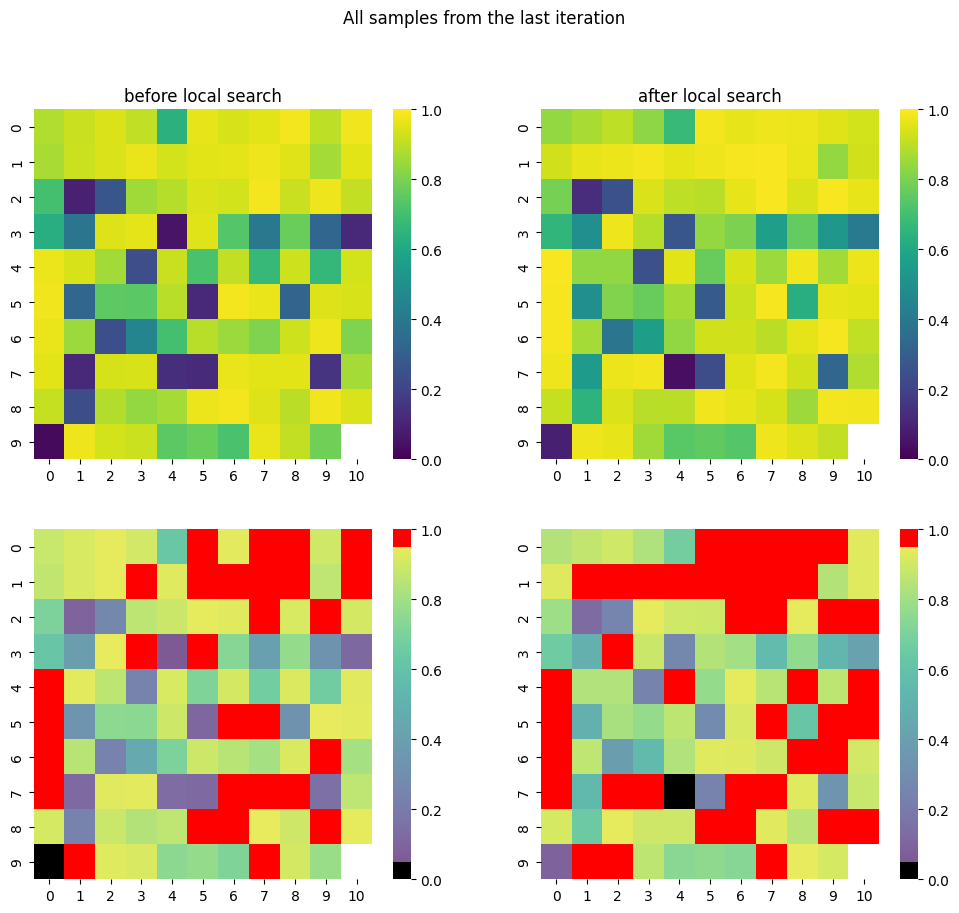

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,10))
sns.heatmap(make_matrix(l_x_filtered), cmap='viridis', vmin=0, vmax=1, ax=ax1)
sns.heatmap(make_matrix(l_x_proc_filtered), cmap='viridis', vmin=0, vmax=1, ax=ax2)
sns.heatmap(make_matrix(l_x_filtered), cmap=newcmp, vmin=0, vmax=1, ax=ax3)
sns.heatmap(make_matrix(l_x_proc_filtered), cmap=newcmp, vmin=0, vmax=1, ax=ax4)
ax1.set_title('before local search')
ax2.set_title('after local search')
plt.suptitle('All samples from the last iteration')

739528.5327637556
6124.384949704379


Text(0.5, 0.98, 'Best 10.0% samples from last iteration')

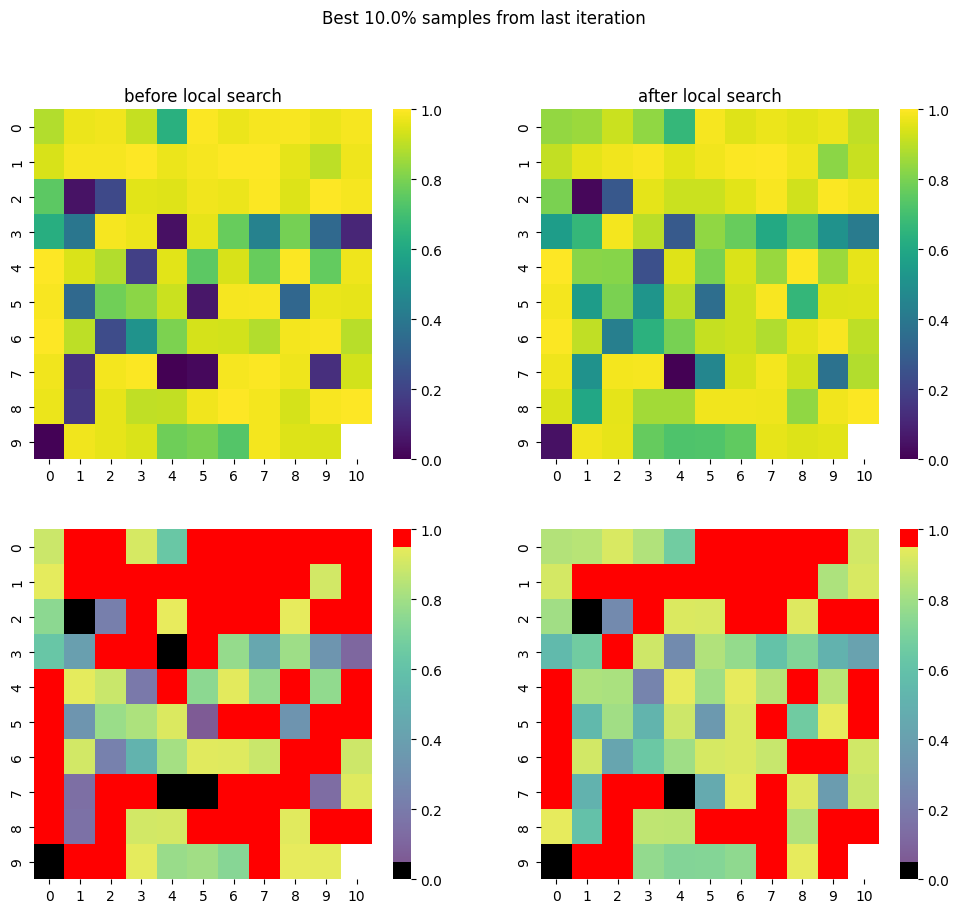

In [16]:
alpha = .1

l_x_fx = list(zip(l_x, l_fx))
l_x_fx.sort(key=lambda t: t[1])
l_x_fx = l_x_fx[:int(alpha * len(l_x_fx))]
l_x_filtered = [t[0] for t in l_x_fx]
print(np.mean([[t[1] for t in l_x_fx]]))

l_x_fx_proc = list(zip(l_x_proc, l_fx_proc))
l_x_fx_proc.sort(key=lambda t: t[1])
l_x_fx_proc = l_x_fx_proc[:int(alpha * len(l_x_fx_proc))]
l_x_proc_filtered = [t[0] for t in l_x_fx_proc]
print(np.mean([[t[1] for t in l_x_fx_proc]]))

import seaborn as sns
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,10))
sns.heatmap(make_matrix(l_x_filtered), cmap='viridis', vmin=0, vmax=1, ax=ax1)
sns.heatmap(make_matrix(l_x_proc_filtered), cmap='viridis', vmin=0, vmax=1, ax=ax2)
sns.heatmap(make_matrix(l_x_filtered), cmap=newcmp, vmin=0, vmax=1, ax=ax3)
sns.heatmap(make_matrix(l_x_proc_filtered), cmap=newcmp, vmin=0, vmax=1, ax=ax4)
ax1.set_title('before local search')
ax2.set_title('after local search')
plt.suptitle(f'Best {alpha*100}% samples from last iteration')
